<a href="https://colab.research.google.com/github/stephenbeckr/randomized-algorithm-class/blob/master/Demos/demo02_sorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 2: sorting

Demo to show the effect of randomized perturbations on the speed of sorting algorithms

APPM 5650 Randomized Algorithms, Fall 2021
Stephen Becker (original MATLAB '19, jupyter '21) & Jake Knigge (Python, '19)

## Subroutines, sorting code

In [4]:
# -------------------------------------------------------------------------------------- #
import numpy as np                      # import numpy package
import time as time                     # import time package
import matplotlib.pyplot as plt         # import matplotlib package
# -------------------------------------------------------------------------------------- #

def bubble_sort(x):                     # sorts x in increasing order
    n = len(x)
    for iteration in range(n-1, 0, -1):
        alreadySorted = True
        for j in range(iteration):
            if a_less_than_b( x[j+1], x[j] ) == True:    # swap them
                tmp    = x[j+1]
                x[j+1] = x[j]
                x[j]   = tmp
                alreadySorted = False
        if alreadySorted == True:
            break
    return x

# -------------------------------------------------------------------------------------- #
def quick_sort(x):                 # sorts x in increasing order
    # quick_sort and supporting code follows example from...
    # http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html
    quick_sort_r(x,0,len(x)-1)
    return x

# -------------------------------------------------------------------------------------- #
def quick_sort_r(x, first, last):   # recursive workhorse for quick_sort
    if first < last:
       split = partition(x, first, last)
       quick_sort_r(x, first, split-1)
       quick_sort_r(x, split+1, last)

# -------------------------------------------------------------------------------------- #
def partition(x,first,last):    # find the split point and move other items
   pivotvalue = x[first]
   left = first + 1
   right = last
   done = False
   while not done:
       while left <= right and x[left] <= pivotvalue:
           a_less_than_b.counter = a_less_than_b.counter + 1
           left = left + 1
       while x[right] >= pivotvalue and right >= left:
           a_less_than_b.counter = a_less_than_b.counter + 1
           right = right - 1
       if right < left:
           done = True
       else:
           temp = x[left]
           x[left] = x[right]
           x[right] = temp
   temp = x[first]
   x[first] = x[right]
   x[right] = temp
   return right

# -------------------------------------------------------------------------------------- #
# This is done analogously to how we did this in Matlab (with a global or "persistent" variable)
# There are surely more pythonic ways to do this; at the very least, you could define a class
def a_less_than_b(a, b):
    y = (a < b)
    a_less_than_b.counter += 1          # counter property used to track function calls
    return y

### and the main demonstration:

In [27]:
np.random.seed(seed = 2)                # set seed for reproducibility
nList = np.logspace(1, 2.75, num = 10, dtype=np.int64 );
N = len(nList);
nReps = 5
bubble = np.zeros((N,1)); quick = np.zeros((N,1));
bubbleRandom = np.zeros((N,nReps)); quickRandom = np.zeros((N,nReps));
for ni in range(N):
    n = nList[ni]
    print(ni+1, 'of', N, 'trials')

    # Bubble sort
    x = np.linspace(n,1,n);   # what we want to sort (adversarial choice!)
    a_less_than_b.counter = 0
    y = bubble_sort(x);
    bubble[ni] = a_less_than_b.counter;

    # Quick sort
    a_less_than_b.counter = 0
    #x = np.linspace(1,n,n);
    x = np.linspace(n,1,n);
    y = quick_sort(x);
    quick[ni] = a_less_than_b.counter;

    # Now apply random permutations
    # (do this a few times and average)
    for r in range(nReps):
        x = x[np.random.permutation(np.int(n))];
        a_less_than_b.counter = 0;
        y = bubble_sort(x);
        bubbleRandom[ni, r] = a_less_than_b.counter;

        x = x[np.random.permutation(np.int(n))];
        a_less_than_b.counter = 0;
        y = quick_sort(x);
        quickRandom[ni, r] = a_less_than_b.counter;

1 of 10 trials
2 of 10 trials
3 of 10 trials
4 of 10 trials
5 of 10 trials
6 of 10 trials
7 of 10 trials
8 of 10 trials
9 of 10 trials
10 of 10 trials


... and plot it ...

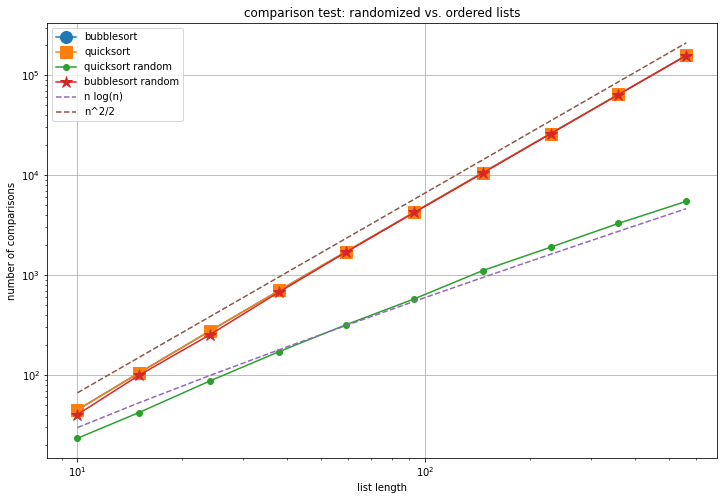

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
line1, = ax.loglog(nList, bubble, label='bubblesort', marker='o',markersize=12)
line2, = ax.loglog(nList, quick, label='quicksort' , marker='s',markersize=12)
line3, = ax.loglog(nList, np.mean(quickRandom,1), label='quicksort random', marker=".",markersize=12)
line4, = ax.loglog(nList, np.mean(bubbleRandom,1), label='bubblesort random', marker="*",markersize=12)
line5, = ax.loglog(nList, 1.3*np.log(nList)*nList, '--',label='n log(n)')
line6, = ax.loglog(nList, nList**2/1.5, '--',label='n^2/2')
ax.legend(loc='upper left')
ax.grid(True)
ax.set_xlabel('list length')
ax.set_ylabel('number of comparisons')
plt.title('comparison test: randomized vs. ordered lists')
plt.show()